In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from torch.nn.utils.rnn import pad_sequence

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# train
VOCAB_SIZE = 3000
EMBEDDING_SIZE = 10
BATCH_SIZE = 128
EPOCH = 30
# display number
DISNUM = 50
# name
name = 'rnn2-' + 'epo' + str(EPOCH) + 'ebd' + str(EMBEDDING_SIZE) + 'vcb' + str(VOCAB_SIZE)

In [7]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size, num_layers):
        super(RNN, self).__init__()
        self.vocab_size = vocab_size
        self.embedding_size = embedding_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.rnn = nn.RNN(embedding_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)
    def forward(self, inputs):
        embedding = self.embedding(inputs)
        out, hidden = self.rnn(embedding)
        out = self.fc(out)
        return F.log_softmax(out, dim=-1)

In [8]:
# read corpus from file
corpus = []
with open('news2-cleaned.txt', 'r', encoding='utf-8') as f:
    for line in f:
        corpus.append(line.strip().split(' '))
# build word_to_ix
word_to_ix = {}
for sentence in corpus:
    for word in sentence:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
word_to_ix = {k: v if v < VOCAB_SIZE else VOCAB_SIZE for k, v in word_to_ix.items()}
word_to_ix['<UNK>'] = VOCAB_SIZE

In [9]:
inputs = []
targets = []
for sentence in corpus:
    input_sentence = [word_to_ix.get(word, VOCAB_SIZE) for word in sentence[:-1]]
    target_sentence = [word_to_ix.get(word, VOCAB_SIZE) for word in sentence[1:]]
    inputs.append(torch.tensor(input_sentence, dtype=torch.long))
    targets.append(torch.tensor(target_sentence, dtype=torch.long))

In [10]:
# train model
model = RNN(VOCAB_SIZE+1, EMBEDDING_SIZE, 128, 1)
model.to(device)
loss_function = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
for epoch in range(EPOCH):
    total_loss = 0
    for i in tqdm.tqdm(range(0, len(corpus), BATCH_SIZE)):
        input = inputs[i:i+BATCH_SIZE]
        target = targets[i:i+BATCH_SIZE]
        model_input = pad_sequence(input, batch_first=True)
        model_target = pad_sequence(target, batch_first=True)
        model_input = model_input.to(device)
        model_target = model_target.to(device)
        model.zero_grad()
        log_probs = model(model_input)
        loss = loss_function(log_probs.view(-1, VOCAB_SIZE+1), model_target.view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print('Epoch:', epoch, 'Loss:', total_loss)
word_vectors = np.array(model.embedding.weight.data.cpu())

100%|██████████| 2746/2746 [00:32<00:00, 84.17it/s]


Epoch: 0 Loss: 3795.055989533663


100%|██████████| 2746/2746 [00:31<00:00, 86.68it/s]


Epoch: 1 Loss: 3335.6909027397633


100%|██████████| 2746/2746 [00:31<00:00, 86.95it/s]


Epoch: 2 Loss: 3232.347606986761


100%|██████████| 2746/2746 [00:31<00:00, 87.19it/s]


Epoch: 3 Loss: 3177.303010761738


100%|██████████| 2746/2746 [00:31<00:00, 87.12it/s]


Epoch: 4 Loss: 3141.7514658868313


100%|██████████| 2746/2746 [00:31<00:00, 86.95it/s]


Epoch: 5 Loss: 3116.444142013788


100%|██████████| 2746/2746 [00:31<00:00, 86.65it/s]


Epoch: 6 Loss: 3097.2912352383137


100%|██████████| 2746/2746 [00:31<00:00, 86.72it/s]


Epoch: 7 Loss: 3082.911115542054


100%|██████████| 2746/2746 [00:31<00:00, 86.97it/s]


Epoch: 8 Loss: 3071.588531911373


100%|██████████| 2746/2746 [00:31<00:00, 86.78it/s]


Epoch: 9 Loss: 3061.6794885098934


100%|██████████| 2746/2746 [00:31<00:00, 86.56it/s]


Epoch: 10 Loss: 3052.451659142971


100%|██████████| 2746/2746 [00:31<00:00, 86.64it/s]


Epoch: 11 Loss: 3052.307608857751


100%|██████████| 2746/2746 [00:31<00:00, 86.75it/s]


Epoch: 12 Loss: 3041.501518085599


100%|██████████| 2746/2746 [00:31<00:00, 86.62it/s]


Epoch: 13 Loss: 3034.3598622232676


100%|██████████| 2746/2746 [00:31<00:00, 86.88it/s]


Epoch: 14 Loss: 3030.3140599280596


100%|██████████| 2746/2746 [00:31<00:00, 86.75it/s]


Epoch: 15 Loss: 3028.58055023849


100%|██████████| 2746/2746 [00:31<00:00, 86.79it/s]


Epoch: 16 Loss: 3021.02805455029


100%|██████████| 2746/2746 [00:31<00:00, 86.82it/s]


Epoch: 17 Loss: 3020.408637061715


100%|██████████| 2746/2746 [00:31<00:00, 86.69it/s]


Epoch: 18 Loss: 3015.270686298609


100%|██████████| 2746/2746 [00:31<00:00, 86.68it/s]


Epoch: 19 Loss: 3012.507962450385


100%|██████████| 2746/2746 [00:31<00:00, 86.56it/s]


Epoch: 20 Loss: 3009.902985781431


100%|██████████| 2746/2746 [00:31<00:00, 86.49it/s]


Epoch: 21 Loss: 3008.885074496269


100%|██████████| 2746/2746 [00:31<00:00, 86.54it/s]


Epoch: 22 Loss: 3005.490576311946


100%|██████████| 2746/2746 [00:31<00:00, 86.46it/s]


Epoch: 23 Loss: 3003.8442677408457


100%|██████████| 2746/2746 [00:31<00:00, 86.54it/s]


Epoch: 24 Loss: 3001.981790751219


100%|██████████| 2746/2746 [00:31<00:00, 86.49it/s]


Epoch: 25 Loss: 3000.1120658814907


100%|██████████| 2746/2746 [00:31<00:00, 86.50it/s]


Epoch: 26 Loss: 2998.615988716483


100%|██████████| 2746/2746 [00:31<00:00, 86.47it/s]


Epoch: 27 Loss: 3004.8186957985163


100%|██████████| 2746/2746 [00:31<00:00, 86.47it/s]


Epoch: 28 Loss: 2993.239348888397


100%|██████████| 2746/2746 [00:31<00:00, 86.46it/s]

Epoch: 29 Loss: 2994.2728994488716


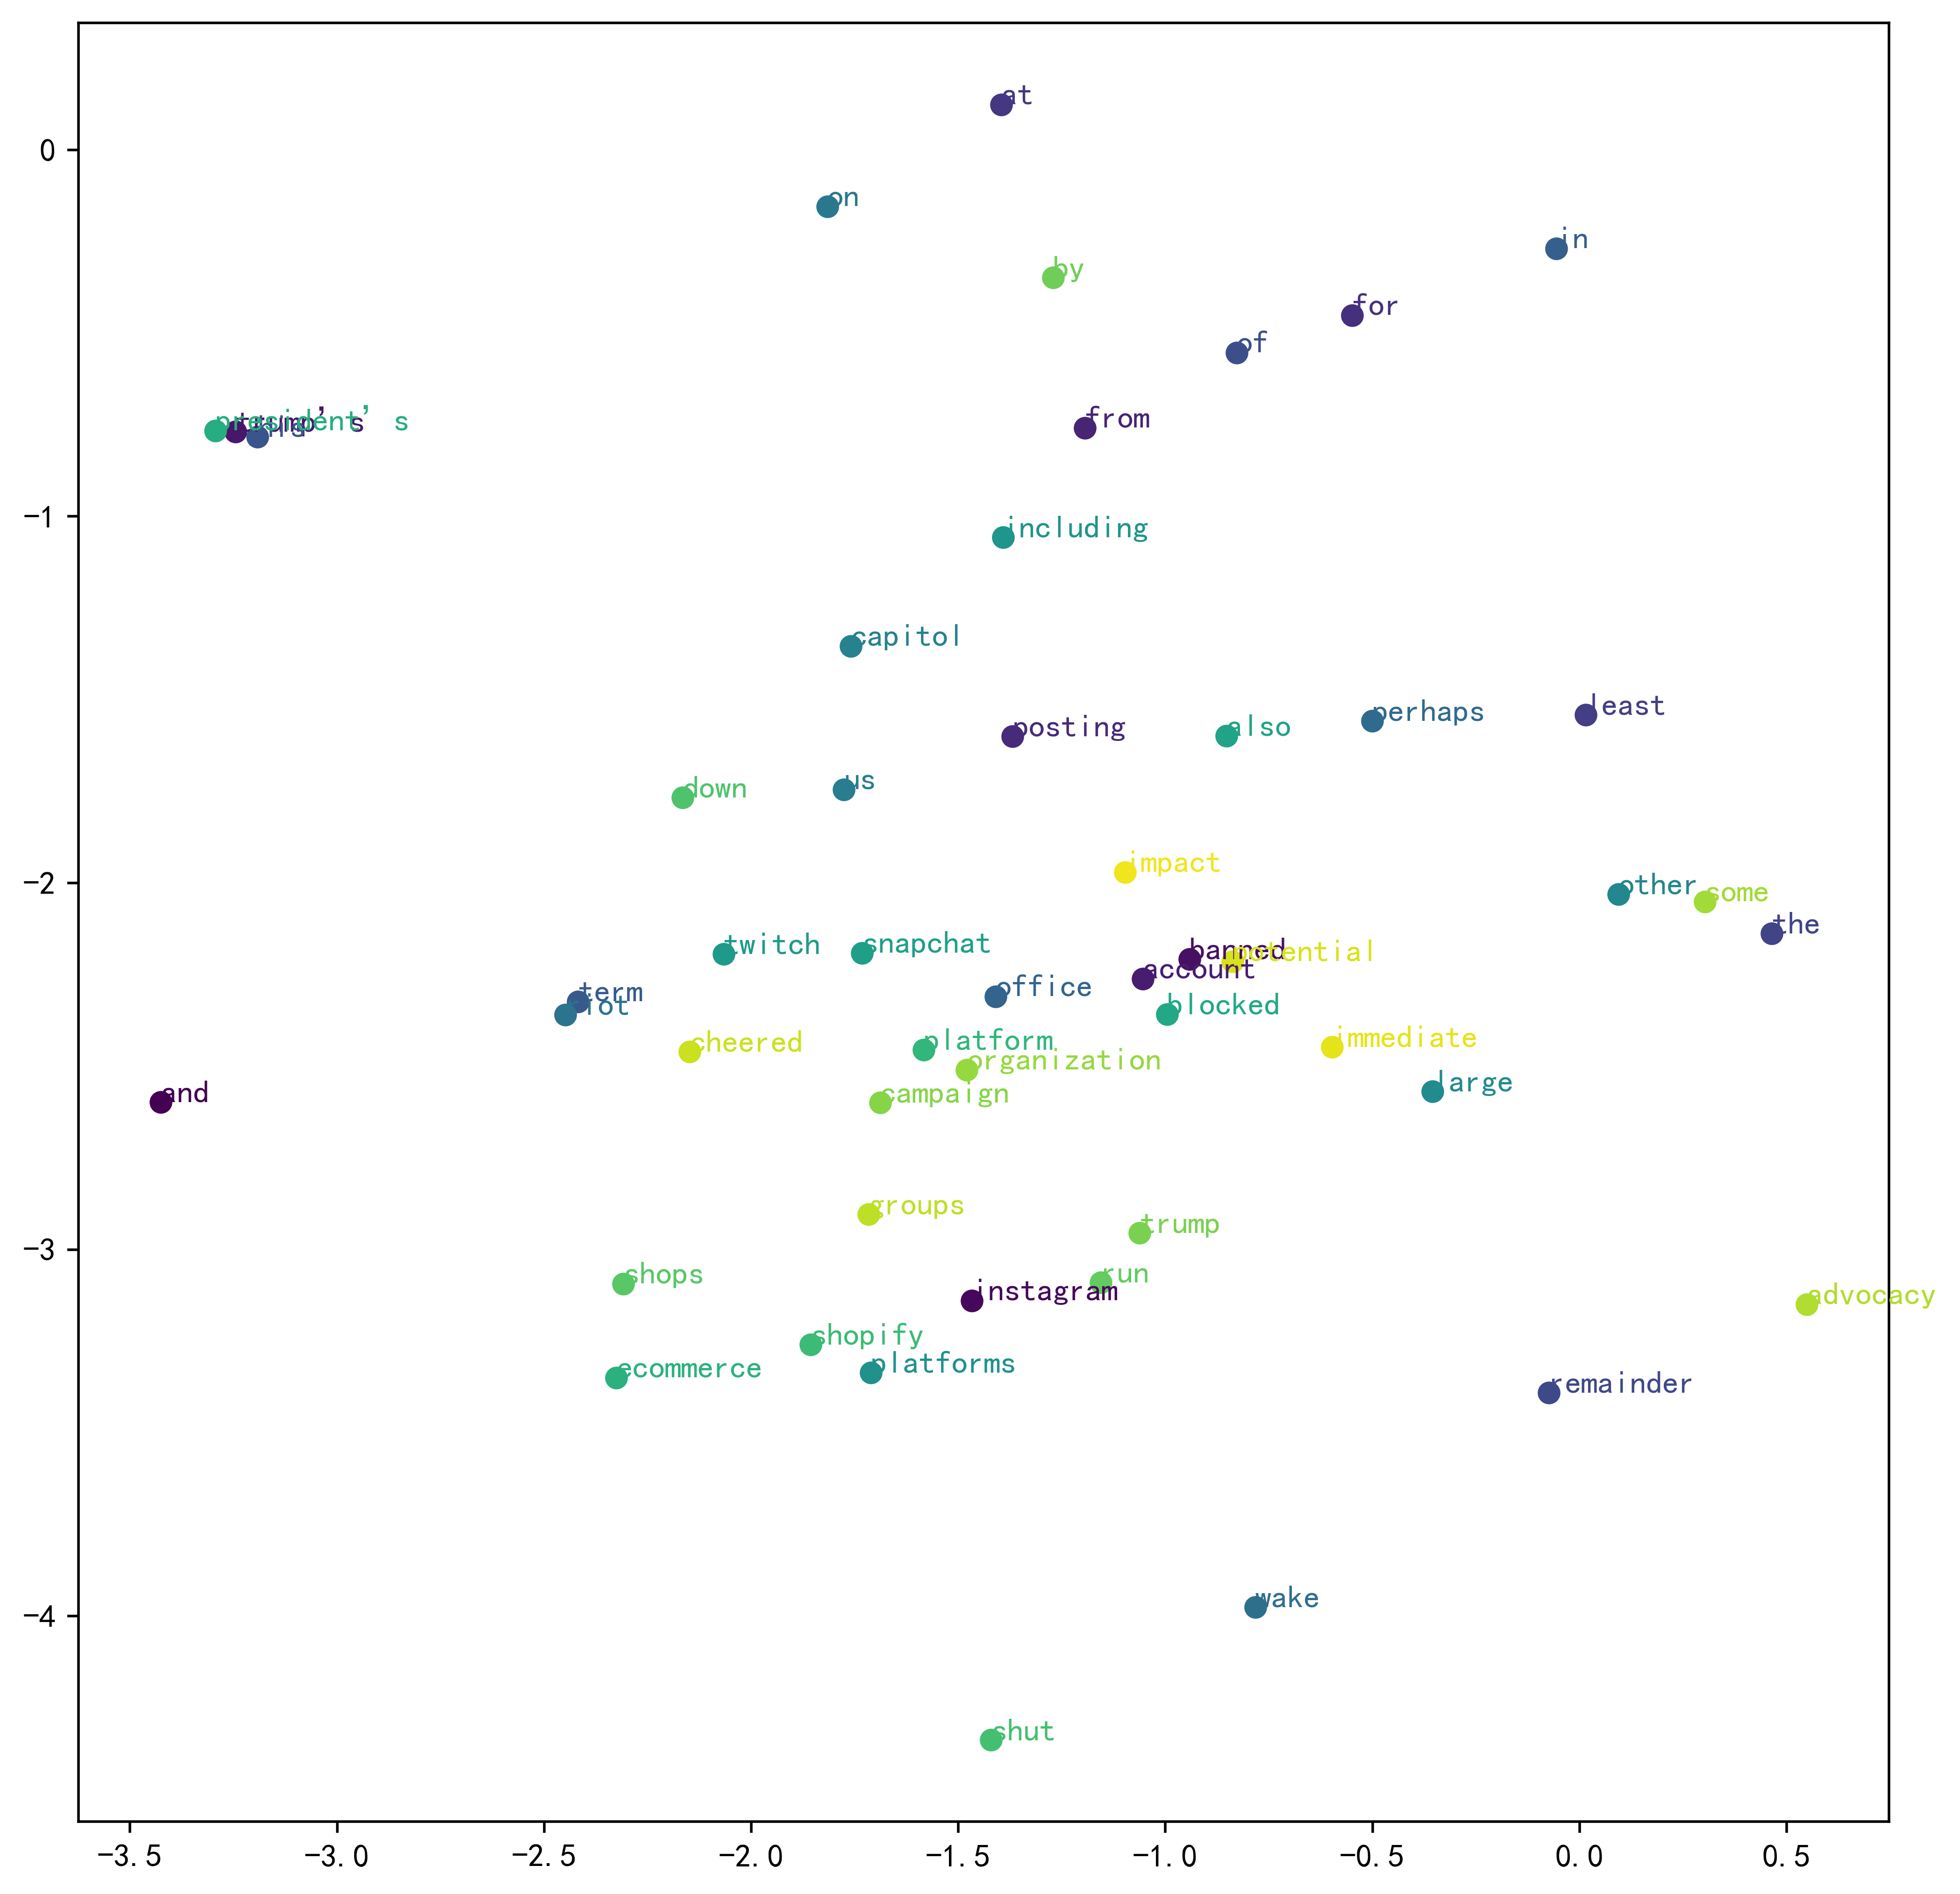

In [11]:
# tsne
tsne = TSNE(n_components=2, random_state=0)
word_vectors_tsne = tsne.fit_transform(word_vectors[:DISNUM])

# plot
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
fig, ax = plt.subplots(figsize=(10, 10), dpi=500)

cmap = plt.get_cmap('viridis')
# cmap = plt.get_cmap('tab10')
for i, word in enumerate(word_to_ix):
    if i == DISNUM:
        break
    color = cmap(i/DISNUM)
    ax.scatter(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1], color=color)
    ax.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), color=color)
plt.savefig(name + '.png')
torch.save(model.state_dict(), name + '.pth')

In [12]:
import pandas as pd
import os
word_list = list(word_to_ix.keys())[::10][:20]
# get similar words using cosine similarity
def get_similar_words(word, n=10):
    if word not in word_to_ix:
        print('Word not in vocabulary')
        return
    word_vector = word_vectors[word_to_ix[word]]
    similarities = np.dot(word_vectors, word_vector) / (np.linalg.norm(word_vectors, axis=1) * np.linalg.norm(word_vector))
    sorted_indices = np.argsort(similarities)[::-1][1:n+1]
    similar_words = []
    similarity_scores = []
    for i in sorted_indices:
        similar_word = list(word_to_ix.keys())[list(word_to_ix.values()).index(i)]
        similarity = similarities[i]
        similar_words.append(similar_word)
        similarity_scores.append(similarity)
    df = pd.DataFrame({'Similar Words': similar_words, 'Similarity Scores': similarity_scores})
    if not os.path.exists(name):
        os.makedirs(name)
    df.to_excel(f'{name}/{name}_{word}.xlsx', index=False)
for word in word_list:
    get_similar_words(word)